<h1>Business Problem</h1>

As a marketing agency, our primary objective is to maximize the return on investment (ROI) for our clients' advertising campaigns. We have conducted two ad campaigns, one on Facebook and the other on AdWords, and we need to determine which platform yields better results in terms of clicks, cortersions, and overall cost-effectiveness. By identifying the most effective platform, we can allocate our resources more efficiently and optimize our advertising strategies to deliver better outcomes for our clients.

<h2>Research Question</h2>
which ad platform is more effective in terms of conversions, clicks, and overall cost-effectiveness?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset=pd.read_csv('ad_campaign_data.csv')

In [5]:
dataset.head()

,date_of_campaign,facebook_ad_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_campaign,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
0,22-12-2021,FACEBOOK AD,3172,62,14,141,1.95,22.58,2.27,ADWORD AD,5754,64,9,177,1.11,14.06,2.77
1,24-12-2021,FACEBOOK AD,3211,38,9,186,1.18,23.68,4.89,ADWORD AD,4954,73,6,54,1.47,8.22,0.74
2,25-12-2021,FACEBOOK AD,1936,53,15,66,2.74,28.30,1.25,ADWORD AD,4702,38,9,187,0.81,23.68,4.92
3,25-12-2021,FACEBOOK AD,1194,45,9,71,3.77,20.00,1.58,ADWORD AD,3718,58,3,161,1.56,5.17,2.78
4,26-12-2021,FACEBOOK AD,2479,44,12,174,1.77,27.27,3.95,ADWORD AD,5562,63,4,162,1.13,6.35,2.57


In [6]:
dataset.shape

(1000, 17)

In [7]:
dataset.dtypes

date_of_campaign             object
facebook_ad_campaign         object
facebook_ad_views             int64
facebook_ad_clicks            int64
facebook_ad_conversions       int64
facebook_cost_per_ad          int64
facebook_ctr                float64
facebook_conversion_rate    float64
facebook_cost_per_click     float64
adword_ad_campaign           object
adword_ad_views               int64
adword_ad_clicks              int64
adword_ad_conversions         int64
adword_cost_per_ad            int64
adword_ctr                  float64
adword_conversion_rate      float64
adword_cost_per_click       float64
dtype: object

In [9]:
dataset['date_of_campaign'] = pd.to_datetime(dataset['date_of_campaign'], format='%d-%m-%Y')


In [10]:
df_mean = dataset.groupby('date_of_campaign', as_index=False).mean(numeric_only=True)


In [11]:
# Get the first non-numeric value for each date
non_numeric = dataset.groupby('date_of_campaign', as_index=False).first()[['date_of_campaign', 'facebook_ad_campaign','adword_ad_campaign']]

# Merge it back with the averaged numeric data
df_cleaned = pd.merge(df_mean, non_numeric, on='date_of_campaign', how='left')


In [12]:
dataset = df_cleaned


In [13]:
dataset.shape


(658, 17)

In [14]:
dataset.isnull().sum()


date_of_campaign            0
facebook_ad_views           0
facebook_ad_clicks          0
facebook_ad_conversions     0
facebook_cost_per_ad        0
facebook_ctr                0
facebook_conversion_rate    0
facebook_cost_per_click     0
adword_ad_views             0
adword_ad_clicks            0
adword_ad_conversions       0
adword_cost_per_ad          0
adword_ctr                  0
adword_conversion_rate      0
adword_cost_per_click       0
facebook_ad_campaign        0
adword_ad_campaign          0
dtype: int64

In [15]:
# List of specific columns you want to convert to int
columns_to_convert = ['facebook_ad_views','facebook_ad_clicks', 'facebook_ad_conversions', 'facebook_cost_per_ad','adword_ad_views','adword_ad_clicks','adword_ad_conversions','adword_cost_per_ad']

# Optionally round before converting
dataset[columns_to_convert] = dataset[columns_to_convert].round(0).astype('int64')



In [16]:
dataset.dtypes

date_of_campaign            datetime64[ns]
facebook_ad_views                    int64
facebook_ad_clicks                   int64
facebook_ad_conversions              int64
facebook_cost_per_ad                 int64
facebook_ctr                       float64
facebook_conversion_rate           float64
facebook_cost_per_click            float64
adword_ad_views                      int64
adword_ad_clicks                     int64
adword_ad_conversions                int64
adword_cost_per_ad                   int64
adword_ctr                         float64
adword_conversion_rate             float64
adword_cost_per_click              float64
facebook_ad_campaign                object
adword_ad_campaign                  object
dtype: object

In [17]:
import pandas as pd

# Assuming your dataset is already loaded
# df = pd.read_csv("your_dataset.csv")

# Select only numeric columns
numeric_cols = dataset.select_dtypes(include='number').columns

# IQR method to remove outliers for all numeric columns
Q1 = dataset[numeric_cols].quantile(0.25)
Q3 = dataset[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows: keep only those that are within the IQR for ALL columns
df= dataset[~((dataset[numeric_cols] < lower_bound) | (dataset[numeric_cols] > upper_bound)).any(axis=1)]

print(f"Original rows: {dataset.shape[0]}")
print(f"Rows after outlier removal: {df.shape[0]}")


Original rows: 658
Rows after outlier removal: 563


In [18]:
df.shape

(563, 17)

In [19]:
df.describe()

,date_of_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
count,563,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000
mean,2023-06-29 08:39:13.108348160,2175.710480,44.783304,11.833037,154.799290,2.254044,30.648857,4.029131,4769.095915,60.948490,5.811723,123.428064,1.298609,10.283083,2.177275
min,2021-12-22 00:00:00,1069.000000,16.000000,5.000000,61.000000,0.520000,7.350000,0.970000,3728.000000,32.000000,3.000000,50.000000,0.600000,3.530000,0.620000
25%,2022-10-06 12:00:00,1774.000000,34.000000,9.000000,122.500000,1.557500,19.510000,2.640000,4365.500000,50.000000,4.000000,97.500000,1.050000,7.410000,1.648333
50%,2023-07-04 00:00:00,2138.000000,46.000000,12.000000,152.000000,2.186667,27.780000,3.740000,4800.000000,61.000000,6.000000,123.000000,1.280000,9.773333,2.110000
75%,2024-04-04 12:00:00,2575.000000,55.000000,14.000000,188.000000,2.760000,38.920000,5.131250,5159.500000,72.000000,7.000000,150.000000,1.500000,12.503750,2.680000
max,2024-12-20 00:00:00,3310.000000,73.000000,19.000000,250.000000,4.770000,72.220000,9.750000,5754.000000,89.000000,9.000000,199.000000,2.180000,21.430000,4.370000
std,NaN,553.277427,13.749122,3.654643,46.888683,0.904043,14.428611,1.872379,516.823877,13.975799,1.712443,37.167885,0.329896,3.867412,0.798458


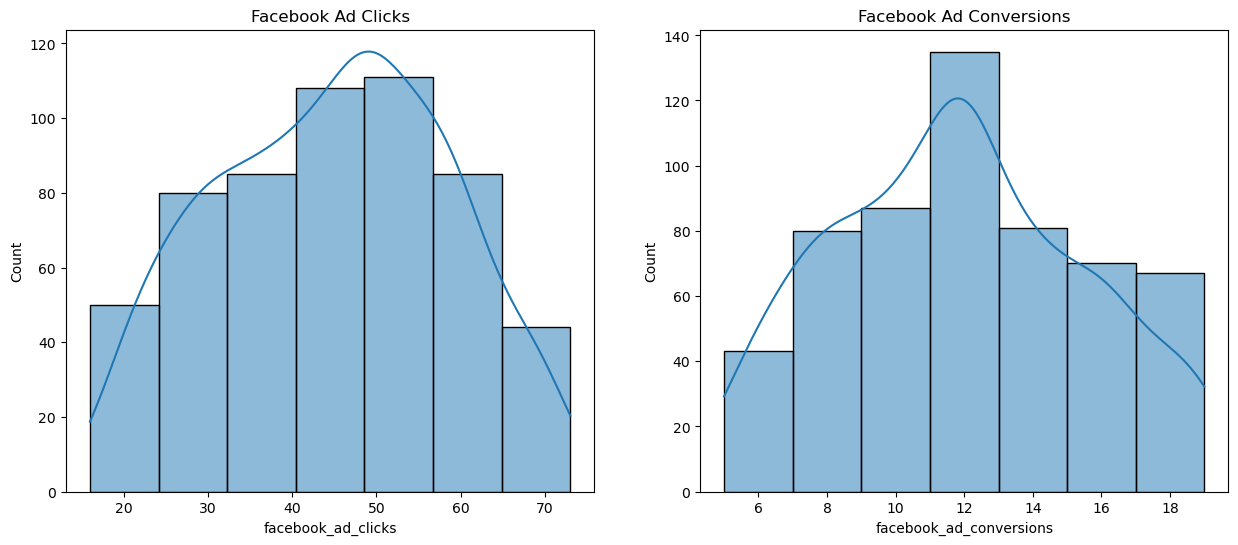

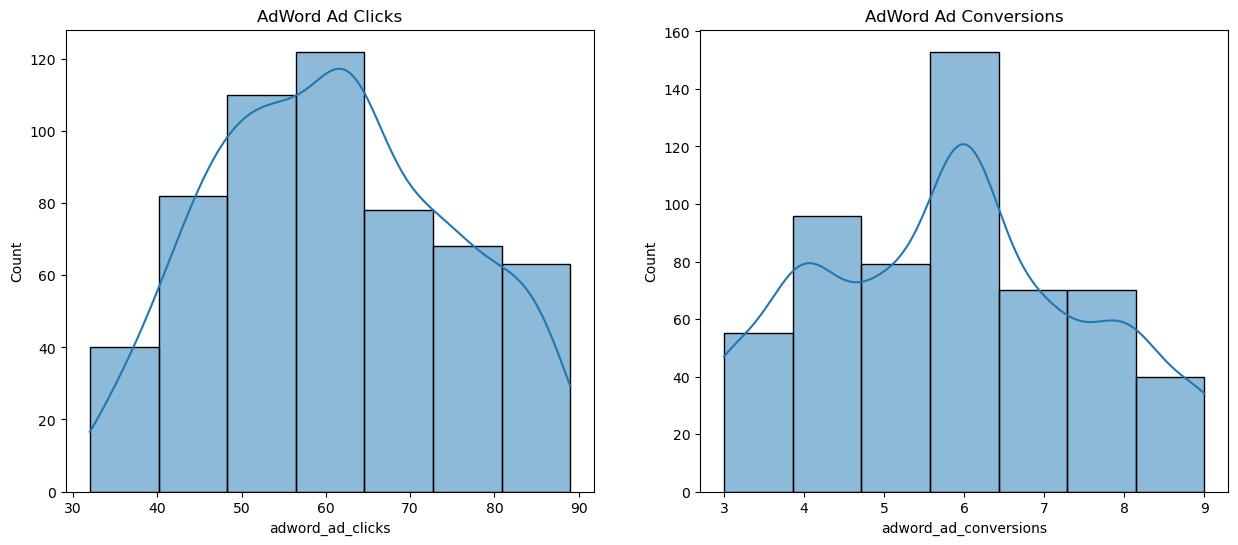

In [20]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook Ad Clicks')
sns.histplot(df['facebook_ad_clicks'],bins=7,edgecolor='k',kde=True)
plt.subplot(1,2,2)
plt.title('Facebook Ad Conversions')
sns.histplot(df['facebook_ad_conversions'],bins=7,edgecolor='k',kde=True)
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('AdWord Ad Clicks')
sns.histplot(df['adword_ad_clicks'],bins=7,edgecolor='k',kde=True)
plt.subplot(1,2,2)
plt.title('AdWord Ad Conversions')
sns.histplot(df['adword_ad_conversions'],bins=7,edgecolor='k',kde=True)
plt.show()

In [21]:
def create_conversion_category(conversion_col):
    category=[]
    for conversion in df[conversion_col]:
        if conversion < 6:
            category.append('less than 6')
        elif 6 <= conversion < 11:
            category.append('6-10')
        elif 11 <= conversion < 16:
            category.append('10 - 15')
        else:
            category.append('more than 15')
    return category

df['Facebook Conversion Category']=create_conversion_category('facebook_ad_conversions')
df['Adwords Conversion Category']=create_conversion_category('adword_ad_conversions')

In [22]:
df[['facebook_ad_conversions','Facebook Conversion Category','adword_ad_conversions','Adwords Conversion Category']].head()

,facebook_ad_conversions,Facebook Conversion Category,adword_ad_conversions,Adwords Conversion Category
0,14,10 - 15,9,6-10
1,9,6-10,6,6-10
2,12,10 - 15,6,6-10
3,12,10 - 15,4,less than 6
4,12,10 - 15,6,6-10


In [26]:
df['Facebook Conversion Category'].value_counts()

Facebook Conversion Category
10 - 15         243
6-10            196
more than 15    110
less than 6      14
Name: count, dtype: int64

In [32]:
pd.DataFrame(df['Facebook Conversion Category'].value_counts()).reset_index()

,Facebook Conversion Category,count
0,10 - 15,243
1,6-10,196
2,more than 15,110
3,less than 6,14


In [40]:
facebook=pd.DataFrame(df['Facebook Conversion Category'].value_counts()).reset_index().rename(columns={'Facebook Conversion Category':'Category'})
facebook

,Category,count
0,10 - 15,243
1,6-10,196
2,more than 15,110
3,less than 6,14


In [42]:
df['Adwords Conversion Category'].value_counts()

Adwords Conversion Category
6-10           333
less than 6    230
Name: count, dtype: int64

In [43]:
adwords=pd.DataFrame(df['Adwords Conversion Category'].value_counts()).reset_index().rename(columns={'Adwords Conversion Category':'Category'})
adwords

,Category,count
0,6-10,333
1,less than 6,230


In [44]:
category_df=pd.merge(facebook,adwords,on='Category',how='outer').fillna(0)
category_df

,Category,count_x,count_y
0,10 - 15,243,0.0
1,6-10,196,333.0
2,less than 6,14,230.0
3,more than 15,110,0.0


In [45]:
category_df=category_df.iloc[[2,1,0,3]]
category_df

,Category,count_x,count_y
2,less than 6,14,230.0
1,6-10,196,333.0
0,10 - 15,243,0.0
3,more than 15,110,0.0


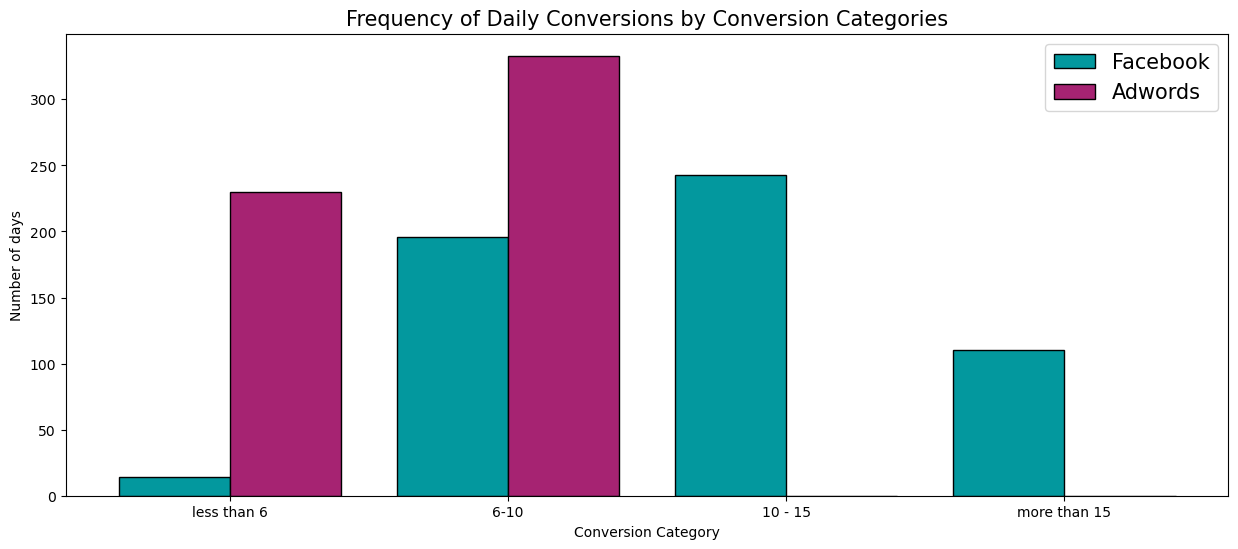

In [46]:
x_axis=np.arange(len(category_df))
plt.figure(figsize=(15,6))
plt.bar(x_axis-0.2,category_df['count_x'],0.4,label='Facebook',color='#03989E',linewidth=1,edgecolor='k')
plt.bar(x_axis+0.2,category_df['count_y'],0.4,label='Adwords',color='#A62372',linewidth=1,edgecolor='k')

plt.xticks(x_axis,category_df['Category'])
plt.xlabel('Conversion Category')
plt.ylabel('Number of days')
plt.title('Frequency of Daily Conversions by Conversion Categories',fontsize=15)
plt.legend(fontsize=15)
plt.show()

<ul>
    <li>
        The data suggests Facebook had more frequent higher conversion days than AdWords, which either had very low conversion rates (less than 6) or            moderate ones (6-10).
    </li>  
    <li>There is a significant variance in the number of high-conversion days between two different campaigns.</li>
    <li>The absence of any days with conversions between 10-15 and more than 15 in AdWords indicates a need to review what strategies were changed or 
        what external factors could have influenced these numbers.</li>
    
</ul>





<h2>Do more clicks on the ad really lead to more sales?</h2>


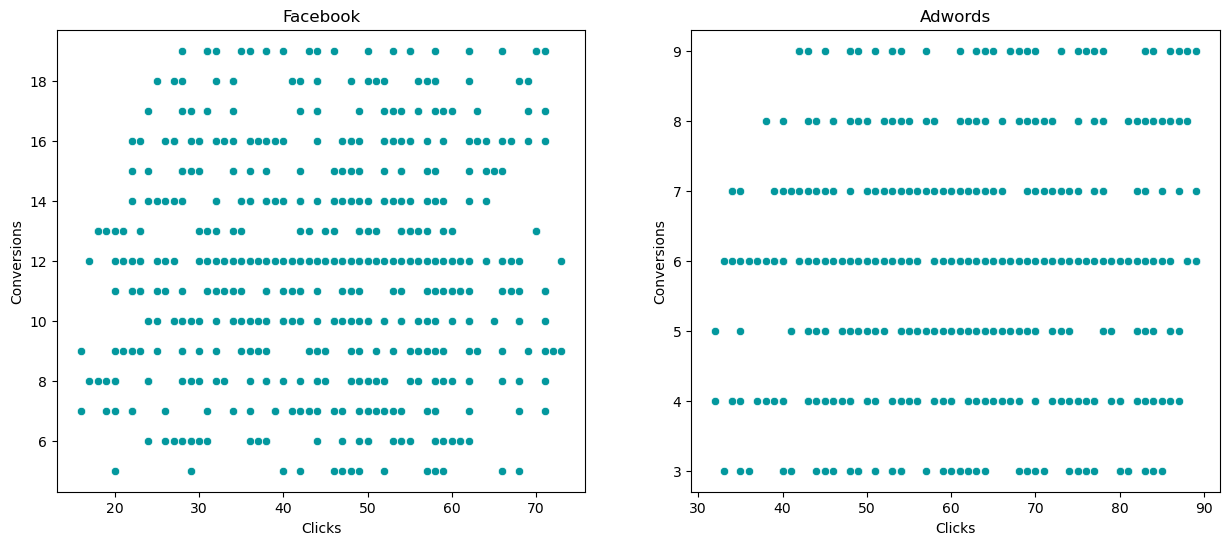

In [53]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook')
sns.scatterplot(x = df['facebook_ad_clicks'], y = df['facebook_ad_conversions'], color = '#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversions')

plt.subplot(1,2,2)
plt.title('Adwords')
sns.scatterplot(x = df['adword_ad_clicks'], y = df['adword_ad_conversions'], color ='#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.show()


In [54]:
facebook_corr=df[['facebook_ad_conversions','facebook_ad_clicks']].corr()
facebook_corr

,facebook_ad_conversions,facebook_ad_clicks
facebook_ad_conversions,1.00000,0.02095
facebook_ad_clicks,0.02095,1.00000


In [59]:
adwords_corr=df[['adword_ad_conversions','adword_ad_clicks']].corr()
adwords_corr

,adword_ad_conversions,adword_ad_clicks
adword_ad_conversions,1.000000,0.081303
adword_ad_clicks,0.081303,1.000000


In [62]:
print('Correlation Coeff \n-----------------------------')
print('Facebook :', round(facebook_corr.values[0,1], 2))
print('Adwords :', round(adwords_corr.values[0,1], 2))

Correlation Coeff 
-----------------------------
Facebook : 0.02
Adwords : 0.08


<li>Both advertising platforms show weak correlations between clicks and conversions.</li> 
-  There is no linear relationship between the number of clicks and conversions.
<h5>This could imply that:</h5>

<li>Other factors (e.g. ad quality, landing page, audience targeting) might influence conversions more than clicks.</li>

<li>Or, click quantity alone is not a good indicator of campaign effectiveness.</li>

In [64]:
# Calculate mean conversion rates
fb_avg = df['facebook_conversion_rate'].mean()
ad_avg = df['adword_conversion_rate'].mean()

print(f"Average Facebook Conversion Rate: {fb_avg:.2f}%")
print(f"Average AdWords Conversion Rate: {ad_avg:.2f}%")


Average Facebook Conversion Rate: 30.65%
Average AdWords Conversion Rate: 10.28%


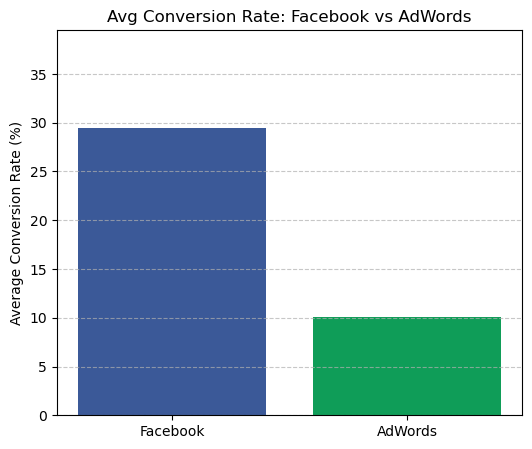

In [67]:
import matplotlib.pyplot as plt

platforms = ['Facebook', 'AdWords']
conversion_rates = [29.48, 10.03]

plt.figure(figsize=(6,5))
plt.bar(platforms, conversion_rates, color=['#3b5998', '#0f9d58'])  # Facebook Blue, AdWords Green
plt.ylabel('Average Conversion Rate (%)')
plt.title('Avg Conversion Rate: Facebook vs AdWords')
plt.ylim(0, max(conversion_rates) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Facebook vs AdWords Conversion Performance

---

#### Higher Efficiency from Facebook Ads
- The **average Facebook conversion rate** is **29.48%**, which is significantly higher than **AdWords at 10.03%**.
- ➤ *This indicates that Facebook ads are more successful at turning clicks into actual conversions.*



#### Better Return on Engagement via Facebook
- With **nearly 3x the conversion rate**, Facebook campaigns are likely delivering **better returns** for the same number of ad clicks compared to AdWords.



#### AdWords Underperformance
- While AdWords may generate a **comparable number of clicks**, the **conversion success is relatively low**.
- This may suggest **targeting or content issues** in AdWords campaigns that need to be optimized.



#### Optimization Opportunity
- Based on this comparison, **investing more in Facebook Ads** could be a more effective strategy—**unless** the **cost per conversion in AdWords** is significantly lower.


# Hypothesis Testing
 **Hypothesis:** Facebook has a higher average conversion rate than AdWords.
 
**Null Hypothesis (H₀):** 
The conversion rate of Facebook ads is **less than or equal to** the conversion rate of AdWords ads

*μ_FB ≤ μ_AdWords*

**Alternative Hypothsis :**) *  
The conversion rate of Facebook ads is **greater than** the conversion rate of AdWordss.  
*μ_FB > μ_AdWords*

In [74]:
from scipy.stats import ttest_ind


t_stat, p_value_two_sided = ttest_ind(
    df['facebook_conversion_rate'],
    df['adword_conversion_rate'],
    equal_var=False  
)

# For one-sided test (Facebook > AdWords), divide the p-value by 2
p_value_one_sided = p_value_two_sided / 2

print("T-statistic:", round(t_stat, 4))
print("One-sided p-value (Facebook > AdWords):", round(p_value_one_sided, 4))

if p_value_one_sided < 0.05:
    print("Reject the null hypothesis: Facebook has a significantly higher conversion rate.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that Facebook is better.")


T-statistic: 32.3493
One-sided p-value (Facebook > AdWords): 0.0
Reject the null hypothesis: Facebook has a significantly higher conversion rate.


- The t-statistic is 32.06, which is a very high value.

- The one-sided p-value is 0.0, which is much less than 0.05 .

**We reject the null hypothesis** and **conclude that Facebook Ads have a statistically significantly higher conversion rate than AdWords Ads.**
This supports the decision to favor Facebook for future marketing campaigns, based on conversion performance.

## Analyzing Facebook Campaign metrics over time.

In [78]:
print(df.columns.tolist())


['date_of_campaign', 'facebook_ad_views', 'facebook_ad_clicks', 'facebook_ad_conversions', 'facebook_cost_per_ad', 'facebook_ctr', 'facebook_conversion_rate', 'facebook_cost_per_click', 'adword_ad_views', 'adword_ad_clicks', 'adword_ad_conversions', 'adword_cost_per_ad', 'adword_ctr', 'adword_conversion_rate', 'adword_cost_per_click', 'facebook_ad_campaign', 'adword_ad_campaign', 'Facebook Conversion Category', 'Adwords Conversion Category']


In [80]:
df=df[['date_of_campaign','facebook_ad_views','facebook_ad_clicks','facebook_ad_conversions','facebook_cost_per_ad','facebook_ctr','facebook_conversion_rate','facebook_cost_per_click']]
df.head()

,date_of_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click
0,2021-12-22,3172,62,14,141,1.950,22.58,2.270
1,2021-12-24,3211,38,9,186,1.180,23.68,4.890
2,2021-12-25,1565,49,12,68,3.255,24.15,1.415
3,2021-12-26,2479,44,12,174,1.770,27.27,3.950
4,2021-12-27,3269,25,12,66,0.760,48.00,2.640


#### At what time of the month or days of the week do we observe the conversions?

In [83]:
df['month']=df['date_of_campaign'].dt.month
df['week']=df['date_of_campaign'].dt.weekday

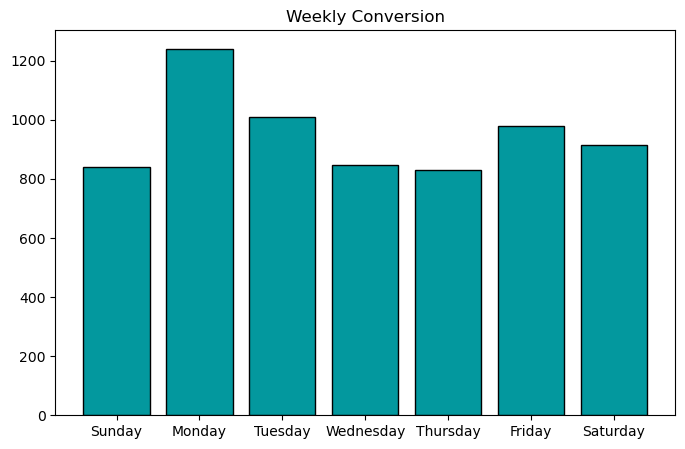

In [85]:
plt.figure(figsize=(8,5))
plt.title('Weekly Conversion')
weekly_conversion=df.groupby('week')[['facebook_ad_conversions']].sum()
week_names=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.bar(week_names,weekly_conversion['facebook_ad_conversions'],color='#03989E',edgecolor='k')
plt.show()

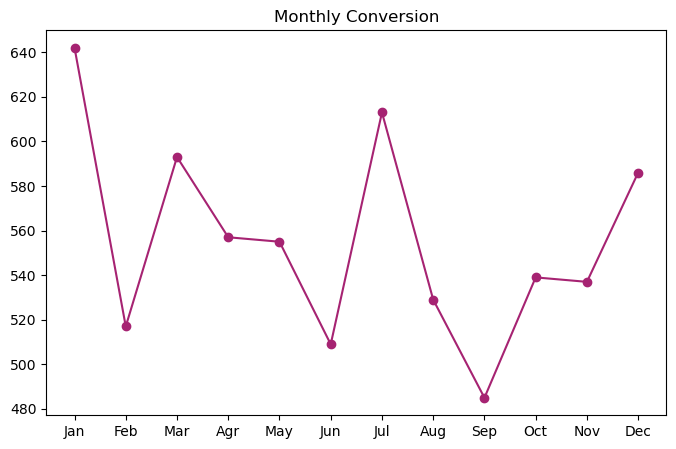

In [87]:
plt.figure(figsize=(8,5))
plt.title('Monthly Conversion')
monthly_conversion=df.groupby('month')[['facebook_ad_conversions']].sum()
month_names=['Jan','Feb','Mar','Agr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(month_names,monthly_conversion['facebook_ad_conversions'],'-o',color='#A62372')
plt.show()

##### Weekly Conversion Trends
- Highest conversions occur on Mondays, suggesting strong engagement at the beginning of the week.

- Weekends (Saturday & Sunday) show moderate conversions, possibly due to lower user activity or ad performance.

- Thursday and Wednesday see slightly lower conversion totals, indicating potential areas for improvement or different audience behavior mid-week.

##### Monthly Conversion Patterns
- January had the highest total conversions, possibly due to fresh marketing pushes after the New Year.

- September recorded the lowest conversions, which may indicate seasonal effects or underperforming campaigns.

- Conversions tend to fluctuate monthly, emphasizing the importance of continuous optimization and A/B testing over time.

- Notable peaks in March, July, and December, possibly due to campaign timing or external events like holidays or sales.

#### How dose the Cost Per Conversion (CPC) trend over time?

Cost Per Conversion (CPC): This metric is used to evaluate the cost effectiveness and profitability of an online advertising campaign. This metric helps marketers understand how much they are spending to obtain each conversion, allowing them to optimize their spending and targeting strategies effectively.

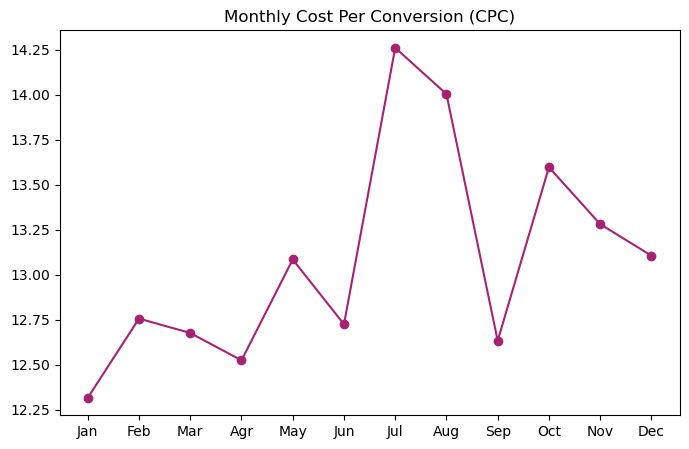

In [92]:
plt.figure(figsize=(8,5))
plt.title('Monthly Cost Per Conversion (CPC)')
monthly_df=df.groupby('month')[['facebook_ad_conversions','facebook_cost_per_ad']].sum()
monthly_df['Cost per Conversion'] = monthly_df['facebook_cost_per_ad']/monthly_df['facebook_ad_conversions']
plt.plot(month_names,monthly_df['Cost per Conversion'],'-o',color='#A62372')
plt.show()

- July recorded the highest CPC, peaking above 14.25, suggesting that Facebook ads were most expensive that month in terms of converting users.

- January had the lowest CPC, around 12.3, indicating a cost-efficient month for conversions.

- June to August showed a sharp rise in CPC, which may point to increased competition or lower ad effectiveness during that period.

- CPC began declining after August, stabilizing from September to December, but still remained slightly above earlier months.

- Overall Trend: While CPC fluctuates, the mid-year spike highlights the importance of monitoring cost efficiency, especially in Q2–Q3 campaigns.

**Is there a long-term equilibrium relationship between advertising spend and conversion rates that suggests a stable, propotional impact of
budget changes on conversions over time?**

In [97]:
score, p_value, _ = coint(df['facebook_cost_per_ad'],df['facebook_ad_conversions'])
print('Cointegration test score:',score)
print('P-value:',p_value)
if p_value < 0.05:
    print("\n p-value is less than significance value, Reject the null hypothesis")
else:
    print("\n p-value is greater than significance value, Accept the null hypothesis")

Cointegration test score: -22.620234231747567
P-value: 0.0

 p-value is less than significance value, Reject the null hypothesis


- Since the p-value is significantly lower than the chosen significance level, we reject the null hypothesis. This indicates that there is a long-term equilibrium relationship between advertising spend (cost) and conversions.

- Businesses can use this understanding of the stable relationship between cost and conversions to optimize their advertising strategies. By investing in campaigns that demonstrate a strong return on investment (ROI) and adjusting spending based on performance, companies can maximize conversions while minimizing costs.